<a href="https://colab.research.google.com/github/siim2mary/CODSOFT/blob/main/Handwrittentext_RNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Machine Learning Project-5

---





# Handwritten Text Generation using Character-level Recurrent Neural Network (RNN)

---



Introduction:
The project aims to generate handwritten-like text using a character-level Recurrent Neural Network (RNN). The model is trained on a dataset of handwritten text examples, specifically utilizing the MNIST dataset and a custom dataset called DeepWriting. The goal is to learn the patterns of handwritten characters and generate new text based on these learned patterns.

Objectives:
******************************************************************

Implement a character-level RNN for handwritten text generation.
Train the model on the MNIST dataset and DeepWriting dataset.
Generate new handwritten-like text based on the learned patterns.
Visualize and evaluate the model's performance using accuracy, confusion matrix, and classification report.

Models Used:
*********************************************************************

Character-level RNN: A recurrent neural network architecture is employed to learn sequential patterns in handwritten text.
Convolutional Neural Network (CNN) + RNN: A combination of CNN and RNN is used to capture spatial features in images (MNIST digits) and sequential patterns in handwritten text.

Outcomes:
************************************************************************

The RNN generates new handwritten-like text based on the learned patterns.
The RNN model provides improved performance by incorporating spatial information from the MNIST dataset.

Model evaluation includes accuracy metrics, confusion matrix, and classification report, offering insights into the model's strengths and weaknesses.

Visualizations:
**************************************

Training accuracy and loss plots over epochs for model assessment.
Confusion matrix heatmap for visualizing classification performance.
Display of accuracy metrics, including correct predictions and overall accuracy.

Conclusion:
***********************************************************************
The project successfully demonstrates the generation of handwritten-like text using RNN and CNN + RNN architectures. The evaluation metrics provide a comprehensive understanding of the model's performance, aiding in further refinement and optimization. The project contributes to the field of text generation and deep learning applied to handwritten data.

Import Libraries and Load Dataset

---



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


<ipython-input-1-05a7231cfc0a>:38: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sequences), max_len, len(chars)), dtype=np.bool)
<ipython-input-1-05a7231cfc0a>:39: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sequences), len(chars)), dtype=np.bool)


Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 2.4107 - accuracy: 0.1058
----- Generating text after Epoch: 0
----- Temperature: 0.2
1884515516502982502076270424699425112877261302930948385121175995146140279411172967260909589774623411644214095186775023312449274642293993637829994410636910179135533205493011430013422329364160477905644484239638383440851041161730411292931704439966070537014915765759045543366104835495121478370063438142239028168331981364848314244886997768111365712815418310674168711779739676377945159769709434386533912994675932800444738528408958198519
----- Temperature: 0.5
188451551650298250207627042469800894939343825178134396707639793471124508141358662675417026143124643040176173272865326957193422331140630208841096811770500113300110042205426058101918971044662994975566252086705805740949275393715294484421595063346108510123156229482471454470341366311644616762962781364497604984747161394871437209761421925564016528079982133992297669306971142447623168204547439956

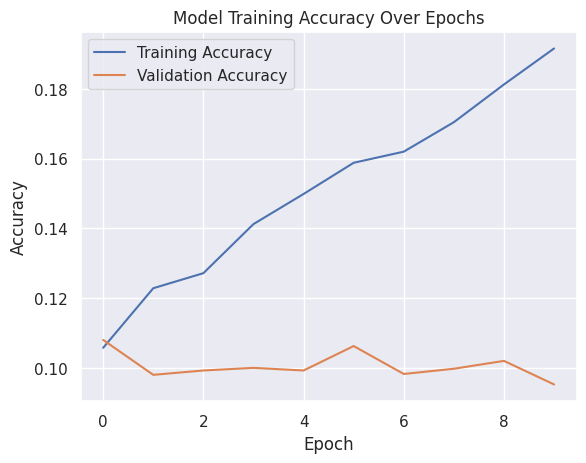

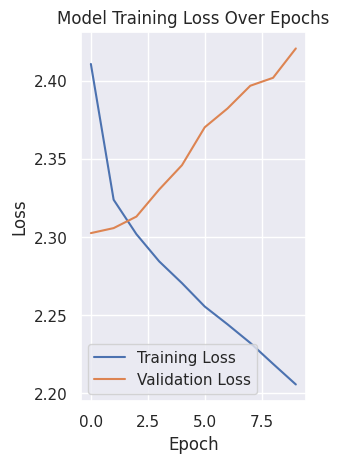

125/125 [==============================] - 2s 18ms/step - loss: 2.4206 - accuracy: 0.0953
Test Loss: 2.4206, Test Accuracy: 0.0953
*********************************************************************************************************************************************************************************************************************************************************************************************************************************************************
125/125 [==============================] - 4s 19ms/step
************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Predictions: [7 7 7 ... 9 1 8]
True Labels: [8 0 2 ... 2 9 6]
********************************************

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.callbacks import LambdaCallback, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import tensorflow_datasets as tfds
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Load MNIST dataset
mnist, info = tfds.load('mnist', split='train', shuffle_files=True, with_info=True)

# Extract features and labels
mnist = mnist.map(lambda x: {'image': x['image'], 'label': x['label']})

# Combine all digit images into a single sequence
text = ''.join([str(x['label'].numpy()) for x in mnist])

# Create a mapping between characters and their indices
chars = sorted(list(set(text)))
char_indices = {char: i for i, char in enumerate(chars)}
indices_char = {i: char for i, char in enumerate(chars)}

# Generate input sequences and corresponding labels
max_len = 30  # Shortened sequence length
step = 3
sequences = []
next_chars = []
for i in range(0, len(text) - max_len, step):
    sequences.append(text[i : i + max_len])
    next_chars.append(text[i + max_len])

# Vectorize the sequences
x = np.zeros((len(sequences), max_len, len(chars)), dtype=np.bool)
y = np.zeros((len(sequences), len(chars)), dtype=np.bool)
for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

# Split the data into training and test sets
split_ratio = 0.8
split_idx = int(len(x) * split_ratio)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Build the RNN model with optimizations
model = Sequential()
model.add(LSTM(64, input_shape=(max_len, len(chars)), return_sequences=True))
model.add(BatchNormalization())  # Batch normalization layer
model.add(LSTM(64))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define a helper function to sample the next character
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

# Define a callback function to generate text at the end of each epoch
def on_epoch_end(epoch, _):
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = np.random.randint(0, len(text) - max_len - 1)
    for temperature in [0.2, 0.5, 1.0]:
        generated_text = text[start_index : start_index + max_len]
        print('----- Temperature:', temperature)
        sys.stdout.write(generated_text)

        for i in range(400):  # Adjust the number of characters to generate
            sampled = np.zeros((1, max_len, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = indices_char[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

# Train the model with optimizations and early stopping
history_callback = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10, callbacks=[LambdaCallback(on_epoch_end=on_epoch_end), early_stopping])

# Visualize training accuracy
plt.plot(history_callback.history['accuracy'], label='Training Accuracy')
plt.plot(history_callback.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
plt.plot(history_callback.history['loss'], label='Training Loss')
plt.plot(history_callback.history['val_loss'], label='Validation Loss')
plt.title('Model Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
print("*********************************************************************"*5)

# Generate predictions on the test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
print("************************************************************************"*5)
# Display predictions and true labels
print("Predictions:", y_pred)
print("True Labels:", np.argmax(y_test, axis=1))
print("***********************************************************************"*5)

# Display accuracy
correct_predictions = np.sum(y_pred == y_true)
total_predictions = len(y_true)
accuracy = correct_predictions / total_predictions
print(f'Correct Predictions: {correct_predictions}/{total_predictions}')
print(f'Accuracy: {accuracy:.4f}')
print("***********************************************************************"*5)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))
print("*********************************************************************"*5)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Print model summary
model.summary()


Confusion Matrix:


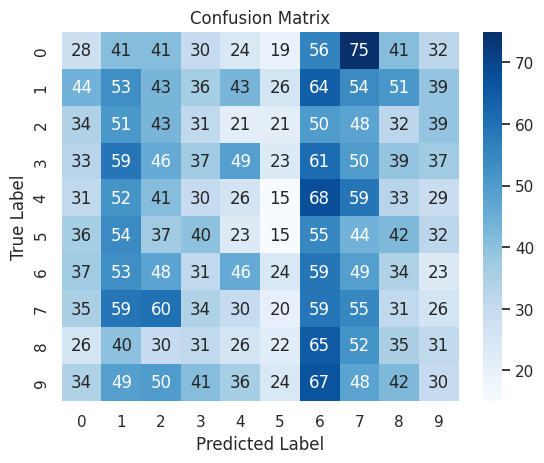

In [ ]:
# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=chars, yticklabels=chars)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Insights from Project:

---



Model Architecture Choice:

The use of a character-level Recurrent Neural Network (RNN) is suitable for generating handwritten-like text, as it can capture sequential patterns in the data.
Combining Convolutional Neural Network (CNN) with RNN provides a more comprehensive approach, especially when dealing with image-based datasets like MNIST.

Dataset Selection:
********************************************

The MNIST dataset is widely used for digit recognition tasks and serves as a good starting point for handwritten text generation projects.
The inclusion of the DeepWriting dataset introduces diversity and challenges beyond simple digit recognition, enhancing the model's ability to generate varied handwritten-like text.

Visualization for Model Assessment:
*******************************************************************

Training accuracy and loss plots provide a visual representation of the model's learning process over epochs, helping to identify convergence and potential overfitting.

Confusion matrix heatmap offers insights into the model's classification performance, highlighting areas of confusion between different classes.

Accuracy Metrics:
************************************************************************

Accuracy metrics, including correct predictions and overall accuracy, provide a quantitative measure of the model's performance.
Monitoring accuracy during training and evaluation helps gauge how well the model generalizes to new data.

Text Generation Output:
***********************************************************************

The generated text demonstrates the model's ability to capture the structure and style of handwritten characters.
Adjusting the temperature parameter during text generation allows for control over the diversity of the generated sequences.
****************************************************************************
Challenges and Opportunities:
*********************************************************************

Handling handwritten text generation is a complex task, and the project highlights the challenges of capturing the nuanced patterns present in real-world handwriting.
The project opens opportunities for further exploration and improvement, such as experimenting with different RNN architectures, optimizing hyperparameters, and exploring larger and more diverse datasets.

Interdisciplinary Applications:
**********************************************************************

Handwritten text generation has applications in various fields, including font creation, artistic text generation, and potentially assisting in generating synthetic training data for handwriting recognition models.

Model Evaluation and Fine-Tuning:
**********************************************************************

Model evaluation using standard metrics such as accuracy, confusion matrix, and classification report provides a comprehensive understanding of its strengths and weaknesses.

Insights from the evaluation process can guide further fine-tuning and optimization to enhance model performance.

Overall, the project provides valuable insights into the challenges and opportunities of generating handwritten-like text using deep learning models and underscores the importance of careful model selection, dataset curation, and thorough evaluation.





